# Ex 1.- Guassian-distributed random value

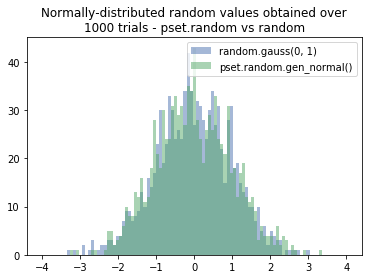

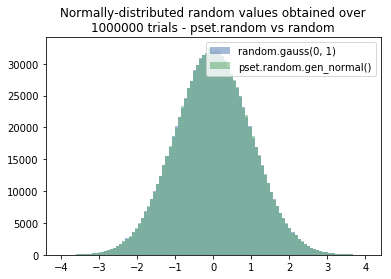

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

from textwrap import wrap
import numpy as np
import random

from pset.random import gen_normal


# Plot results over a set of trials
def test_normal(trials, filename):
    P = [gen_normal() for _ in range(trials)]
    Q = [random.gauss(0, 1) for _ in range(trials)]
    bins = np.linspace(-4, 4, 100)
    plt.figure('Test normal')
    title = '\n'.join(wrap(
        'Normally-distributed random values obtained over {} trials - pset.random vs random'.format(trials),
        50
    ))
    plt.title(title)
    plt.hist(P, bins, alpha=0.5, label='random.gauss(0, 1)')
    plt.hist(Q, bins, alpha=0.5, label='pset.random.gen_normal()')
    plt.legend(loc='upper right')
    plt.savefig('./assets/{}'.format(filename), dpi=400)
    plt.show()

test_normal(10 ** 3, 'ex1-results1.png')
test_normal(10 ** 6, 'ex1-results2.png')

# Ex 2.- (1+1)-ES

In [3]:
import numpy as np

from pset.algorithms import ES1P1
from pset.individuals import Sphere


def run_es1p1_sphere(d, max_trials, precision, fifth_rule_enabled=False):
    parent = Sphere([-99 for _ in range(d)])
    sim = ES1P1(
        max_trials=max_trials,
        precision=precision,
        parent=parent,
        fifth_rule_enabled=fifth_rule_enabled
    )
    print("Starting simulation with d={} (fifth rule {})".format(
        d,
        'enabled' if fifth_rule_enabled else 'disabled')
    ) 
    sim.run()
    
    print("Objective reached")
    print("\tGenerations:", sim.generations)
    print("\tSuccessful mutations:", sum(sim.successful_mutations))
    print("\tChromosome mean:", np.mean(sim.parent.chromosome))
    print("\tFitness:", sim.parent.fitness)


precision = 0.01
max_trials = 100000
run_es1p1_sphere(10, max_trials=max_trials, precision=precision)
run_es1p1_sphere(100, max_trials=max_trials, precision=precision)

run_es1p1_sphere(10, max_trials=max_trials, precision=precision, fifth_rule_enabled=True)
run_es1p1_sphere(100, max_trials=max_trials, precision=precision, fifth_rule_enabled=True)

Starting simulation with d=10 (fifth rule disabled)
Objective reached
	Generations: 100000
	Successful mutations: 391
	Chromosome mean: 0.0026387421236935328
	Fitness: 0.4259425692724451
Starting simulation with d=100 (fifth rule disabled)
Objective reached
	Generations: 100000
	Successful mutations: 1337
	Chromosome mean: 0.14864745560856008
	Fitness: 158.61422411438807
Starting simulation with d=10 (fifth rule enabled)
Objective reached
	Generations: 100000
	Successful mutations: 374
	Chromosome mean: -0.12495015578777005
	Fitness: 0.28857368094209557
Starting simulation with d=100 (fifth rule enabled)
Objective reached
	Generations: 100000
	Successful mutations: 1211
	Chromosome mean: -0.03162669553738553
	Fitness: 91.53402843247675
